In [ ]:
#!pip install timm

   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 2.5/2.5 MB 23.8 MB/s  0:00:00
   ---------------------------------------- 0.0/561.5 kB ? eta -:--:--
   ---------------------------------------- 561.5/561.5 kB 20.0 MB/s  0:00:00

   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3 [huggingface_hub]
   ------------- -------------------------- 1/3

In [1]:
import torch

In [ ]:
import torch
device=torch.device("cpu")
if torch.cuda.is_available():
    device=torch.device("cuda")
elif torch.backends.mps.is_available():
    device=torch.device("mps")

In [3]:
device

device(type='cuda')

In [9]:
from PIL import Image
img=Image.open("image_0823.jpg").convert("RGB")

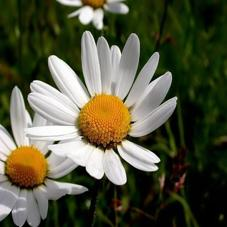

In [24]:
img

In [11]:
img.size

(227, 227)

In [30]:
import timm
model = timm.create_model('tf_efficientnetv2_xl.in21k_ft_in1k', pretrained=True)
model = model.eval()

In [12]:
# Get model-specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

In [ ]:
# unsqueeze single image into batch of 1
output = model(transforms(img).unsqueeze(0))  


In [16]:
output.shape

torch.Size([1, 1000])

In [17]:
top5_probabilities, top5_class_indices = torch.topk(output.softmax(dim=1) * 100, k=5)

In [20]:
top5_probabilities

tensor([[9.0319e+01, 1.4474e-01, 1.4096e-01, 1.3003e-01, 9.0039e-02]],
       grad_fn=<TopkBackward0>)

In [ ]:
top5_class_indices 

tensor([[985, 995, 309, 167, 946]])

In [18]:
with open("imagenet_classes.txt","r") as f:
    categories=[s.strip() for s in f.readlines()]

In [23]:
for probs_row, idxs_row in zip(top5_probabilities, top5_class_indices):
    for p, idx in zip(probs_row, idxs_row):
        cls_name = categories[int(idx.item())]
        print(cls_name, float(p.item()))


daisy 90.3194580078125
earthstar 0.14474117755889893
bee 0.1409551501274109
English foxhound 0.1300317347049713
cardoon 0.09003930538892746


In [25]:
# List all available models
models = timm.list_models()
print(models)

['aimv2_1b_patch14_224', 'aimv2_1b_patch14_336', 'aimv2_1b_patch14_448', 'aimv2_3b_patch14_224', 'aimv2_3b_patch14_336', 'aimv2_3b_patch14_448', 'aimv2_huge_patch14_224', 'aimv2_huge_patch14_336', 'aimv2_huge_patch14_448', 'aimv2_large_patch14_224', 'aimv2_large_patch14_336', 'aimv2_large_patch14_448', 'bat_resnext26ts', 'beit3_base_patch16_224', 'beit3_giant_patch14_224', 'beit3_giant_patch14_336', 'beit3_large_patch16_224', 'beit_base_patch16_224', 'beit_base_patch16_384', 'beit_large_patch16_224', 'beit_large_patch16_384', 'beit_large_patch16_512', 'beitv2_base_patch16_224', 'beitv2_large_patch16_224', 'botnet26t_256', 'botnet50ts_256', 'caformer_b36', 'caformer_m36', 'caformer_s18', 'caformer_s36', 'cait_m36_384', 'cait_m48_448', 'cait_s24_224', 'cait_s24_384', 'cait_s36_384', 'cait_xs24_384', 'cait_xxs24_224', 'cait_xxs24_384', 'cait_xxs36_224', 'cait_xxs36_384', 'coat_lite_medium', 'coat_lite_medium_384', 'coat_lite_mini', 'coat_lite_small', 'coat_lite_tiny', 'coat_mini', 'coat_s

In [26]:
models

['aimv2_1b_patch14_224',
 'aimv2_1b_patch14_336',
 'aimv2_1b_patch14_448',
 'aimv2_3b_patch14_224',
 'aimv2_3b_patch14_336',
 'aimv2_3b_patch14_448',
 'aimv2_huge_patch14_224',
 'aimv2_huge_patch14_336',
 'aimv2_huge_patch14_448',
 'aimv2_large_patch14_224',
 'aimv2_large_patch14_336',
 'aimv2_large_patch14_448',
 'bat_resnext26ts',
 'beit3_base_patch16_224',
 'beit3_giant_patch14_224',
 'beit3_giant_patch14_336',
 'beit3_large_patch16_224',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_sma

In [27]:
avail_pretrained_models = timm.list_models(pretrained=True)
len(avail_pretrained_models), avail_pretrained_models[:5]

(1657,
 ['aimv2_1b_patch14_224.apple_pt',
  'aimv2_1b_patch14_336.apple_pt',
  'aimv2_1b_patch14_448.apple_pt',
  'aimv2_3b_patch14_224.apple_pt',
  'aimv2_3b_patch14_336.apple_pt'])

In [31]:
import timm 
import torch
model_ResNet34 = timm.create_model('resnet34')
x     = torch.randn(1, 3, 224, 224)

In [33]:
model_ResNet34(x).shape

torch.Size([1, 1000])

In [40]:
#To create a model with a custom number of classes, 
# simply pass in num_classes=<number_of_classes>
import timm 
import torch

model2 = timm.create_model('resnet34')
x     = torch.randn(1, 3, 224, 224)
model2(x).shape


torch.Size([1, 1000])

In [49]:
#Reset existing model
x = torch.randn(1, 3, 224, 224)
model2 = timm.create_model('resnet34')
model2.reset_classifier(num_classes=0)  
print(model2(x).shape)

torch.Size([1, 512])


In [50]:
emb=model(x)
emb.shape

torch.Size([1, 1000])

In [ ]:
#To get output of previous to final 1000 class layer
# i.e. pooled penultimate layer
model3 = timm.create_model('resnet34', num_classes=0)
x = torch.randn(1, 3, 224, 224)
model3(x).shape

torch.Size([1, 512])

In [39]:
#To get pooled penultimate shape of tf_efficientnetv2_xl.in21k_ft_in1k
model3 = timm.create_model('tf_efficientnetv2_xl.in21k_ft_in1k', num_classes=0)
x = torch.randn(1, 3, 224, 224)
model3(x).shape

torch.Size([1, 1280])